Hello everyone! I figured I would take a look at this data and see if I can find any interesting insights by doing some EDA and also calculating some additional columns!

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vehicle-sales-data/car_prices.csv


In [2]:
df = pd.read_csv(r'/kaggle/input/vehicle-sales-data/car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


First - I'll get some basic info about the dataset to get a 'feel' for it and what sort of data it contains within it.

* What columns/data do we have?
* What sort of data are within each column?
* Summary of the numerical columns within the dataset

In [3]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [4]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


Next, I'll check if there are any NA columns in the dataset. In the above cells I have seen that this dataset is over 558,000 rows, so in my head I am thinking that a few NA values will not hurt any analysis due to the size of the dataset.

In [6]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

Below, I check the percentage of values missing from each column instead of the total number of NA values. I find that there is only a small percentage of NA's in most columns, so I am dropping them from this dataset afterwards.

In [7]:
df.isna().sum()/len(df)*100

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64

In [8]:
df = df.dropna()
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

Here I check how many rows are left within the dataset.

In [9]:
len(df)

472325

There is something else I think is good to do to avoid outliers skewing the data. I will be looking at cars based on mileage in this dataset. In the df.describe cell that we wrote above, we can see that the maximum mileage is 999,999 and the minimum mileage is 1 which seems like they could be a placeholder values. I see there is also a minimum selling price of $1 on the dataset, which I am going to assume for the purposes of this analysis to be a placeholder value as well. We will deal with these below.

In [10]:
incorrectvalues = df.loc[(df['odometer'] == 999999) | (df['odometer'] == 1) | (df['sellingprice'] == 1)]
incorrectvalues

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
275,2013,Hyundai,Elantra Coupe,GS,Elantra Coupe,automatic,kmhdh6ae8du017422,ca,1.0,999999.0,blue,gray,hyundai motor finance,8025.0,2500.0,Tue Jan 27 2015 04:00:00 GMT-0800 (PST)
697,2013,Nissan,Maxima,3.5 S,Sedan,automatic,1n4aa5apxdc839917,ca,1.0,1.0,gray,black,enterprise vehicle exchange / tra / rental / t...,16950.0,1000.0,Tue Jan 13 2015 13:00:00 GMT-0800 (PST)
2942,2009,Honda,Civic,LX,Sedan,automatic,2hgfa16579h341583,ca,3.0,1.0,silver,gray,ahfc/honda lease trust/hvt inc.,9325.0,1000.0,Tue Jun 30 2015 10:00:00 GMT-0700 (PDT)
3076,2008,Honda,Civic,LX,Sedan,automatic,2hgfa16518h311011,ca,1.0,1.0,silver,gray,ahfc/honda lease trust/hvt inc.,7900.0,1300.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
3090,2008,Chrysler,300,LX,Sedan,automatic,2c3ka43r78h186722,ca,19.0,1.0,white,black,wells fargo dealer services,32500.0,1300.0,Thu Mar 26 2015 04:30:00 GMT-0700 (PDT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551478,2003,Acura,MDX,Touring,suv,automatic,2hnyd18653h516063,md,1.0,1.0,gold,beige,bolsam autos llc,5325.0,600.0,Tue Jun 16 2015 06:00:00 GMT-0700 (PDT)
551553,2003,Volkswagen,Passat,GLS 1.8T,sedan,automatic,wvwpd63b13p343284,wa,2.0,1.0,silver,black,donate for charity,2450.0,500.0,Wed Jun 17 2015 05:30:00 GMT-0700 (PDT)
551621,2000,Subaru,Outback,Limited,wagon,automatic,4s3bh6862y7671346,wa,2.0,1.0,black,gray,donate for charity,3025.0,1050.0,Wed Jun 17 2015 05:30:00 GMT-0700 (PDT)
553964,2012,Ford,Taurus,SE,sedan,automatic,1fahp2dw4cg130924,ca,33.0,1.0,red,beige,high performance capital,12650.0,3700.0,Wed Jun 24 2015 05:30:00 GMT-0700 (PDT)


In [11]:
df = df[(df['odometer'] < 999999) & (df['odometer'] > 1) & (df['sellingprice'] > 1)]

Below I will check the length of the dataframe just to make sure this executed properly. The previous length of the dataframe was 472325. And we should've filtered out 1040 rows based on our incorrect values dataset.

In [12]:
len(df)

471285

Now we have the dataframe the way we want it and we can begin our exploration and analysis.

Below I first check the number of cars from each make in the dataset. I do have some knowledge of common vehicles prior to analyzing this dataset, but the results seem to confirm that most of the common vehicle makes are at the top of this list. 

I then also check the number of cars by body type. And it seems like the majority of cars are both sedans and SUV's which makes sense with common knowledge of vehicles.

In [13]:
df['make'].value_counts()

make
Ford             80884
Chevrolet        54035
Nissan           43953
Toyota           35266
Dodge            27120
Honda            24721
Hyundai          18630
BMW              17453
Kia              15809
Chrysler         15109
Infiniti         14006
Mercedes-Benz    13967
Jeep             12713
Volkswagen       10757
Lexus            10391
GMC               9188
Mazda             6917
Cadillac          6288
Lincoln           4909
Audi              4787
Acura             4492
Buick             4426
Subaru            4360
Ram               4043
Pontiac           3992
Mitsubishi        3648
Volvo             3062
MINI              2944
Saturn            2547
Mercury           1561
Scion             1544
Land Rover        1319
Jaguar            1250
Porsche           1155
Suzuki             972
HUMMER             768
FIAT               725
Saab               410
smart              342
Oldsmobile         307
Isuzu              177
Maserati           108
Bentley            105
Aston 

In [14]:
df['body'].value_counts().head(10)

body
Sedan          174161
SUV            100131
sedan           36628
suv             20611
Hatchback       19315
Minivan         18237
Coupe           13074
Wagon           11997
Crew Cab        11494
Convertible      7696
Name: count, dtype: int64

Below I figured it would be interesting to find the annual mileage driven for each car. I assumed this data was collected in 2016 since I can see the newest model year is 2015, and this is used vehicle sales. I used 2016 as the base year to calculate the mileage per year, based of the age of the car.

In the graph below you can see that many of the common brands are driven more often per year on average than luxury brands. 

In [15]:
df['annualmileage'] = df['odometer'] / (2016 - df['year'])
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,annualmileage
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),16639.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),9393.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),665.5
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),14282.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),1320.5


<Axes: title={'center': 'Annual Mileage Driven per Vehicle Make'}, xlabel='make'>

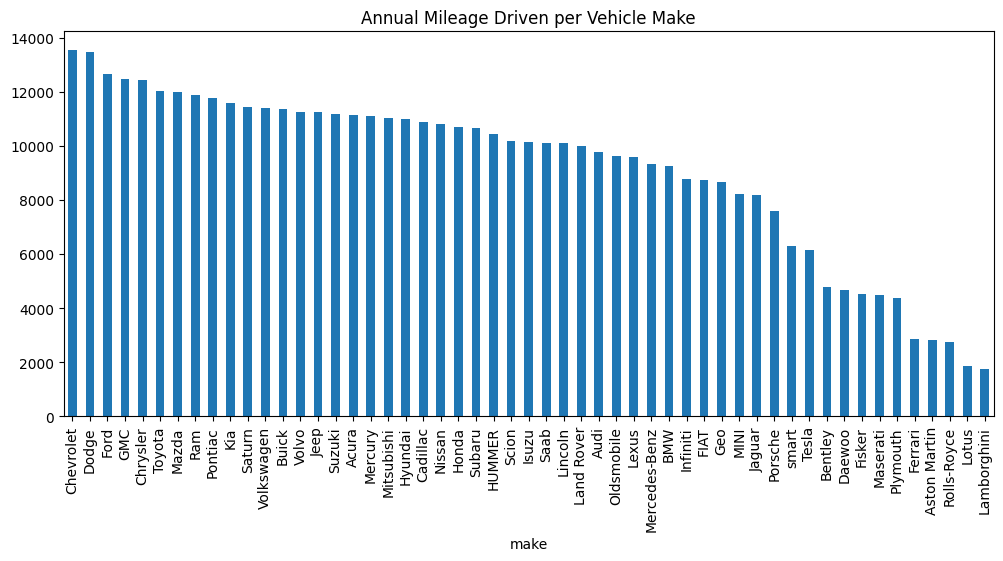

In [16]:
dfbymake = df.groupby('make').mean(numeric_only=True)
dfmileagebymake = dfbymake['annualmileage'].sort_values(ascending=False)
dfmileagebymake.plot.bar(title='Annual Mileage Driven per Vehicle Make', figsize=(12,5))

<Axes: title={'center': 'Average Total Mileage per Make'}, ylabel='make'>

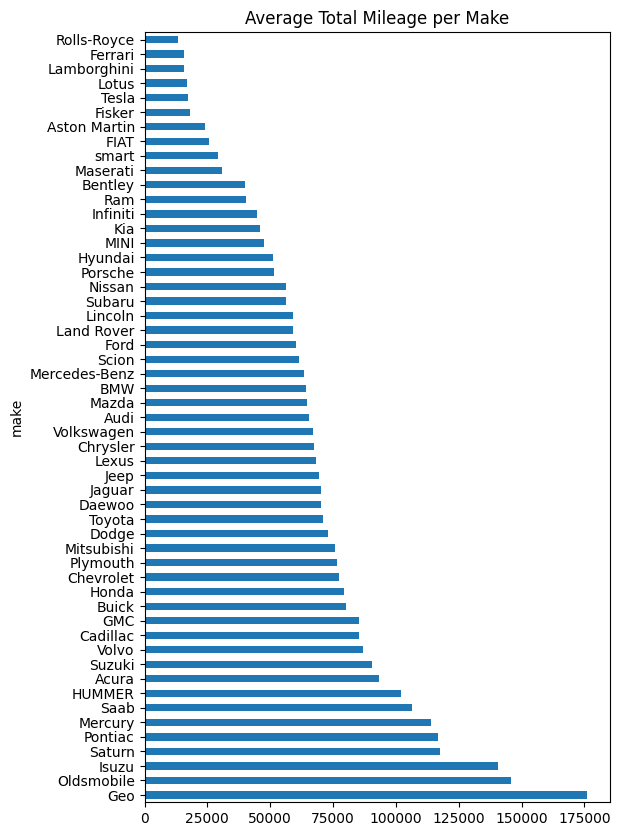

In [17]:
dftotalmileagebymake = dfbymake['odometer'].sort_values(ascending=False)
dftotalmileagebymake.plot.barh(title='Average Total Mileage per Make', figsize=(6,10))

I also check the average price per make of vehicle. We can see below that the luxury brands make the top of this list.

<Axes: title={'center': 'Top 10 Highest Prices by Make'}, xlabel='make'>

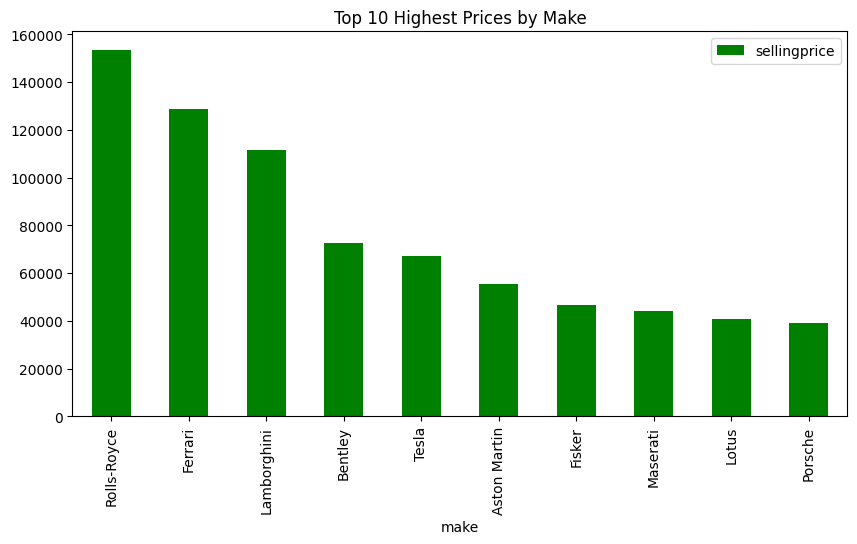

In [18]:
dfhighestprices = dfbymake[['sellingprice']].sort_values(by='sellingprice', ascending=False).head(10)
dfhighestprices.plot.bar(title='Top 10 Highest Prices by Make', color='green', figsize=(10,5))

Below I check to see what the most expensive car is, and I see that its a Ford Escape, which is not a very expensive car. I also see that the MMR is much less than the selling price, which leads me to believe the selling price is a typo. I will address that here.

In [19]:
df.loc[df['sellingprice'] == df['sellingprice'].max()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,annualmileage
344905,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,43.0,27802.0,green,tan,ford-lincoln dealer program,22800.0,230000.0,Wed Feb 25 2015 02:00:00 GMT-0800 (PST),13901.0


In [20]:
df.at[344905, 'sellingprice'] = 23000

Now that the selling price is fixed on the Ford Escape, we can run this line again to find that the Ferrari 458 is the most expensive car sold, which makes sense.

In [21]:
df.loc[df['sellingprice'] == df['sellingprice'].max()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,annualmileage
548169,2011,Ferrari,458 Italia,Base,coupe,automatic,zff67nfa1b0178698,fl,46.0,12116.0,red,black,platinum motor cars,182000.0,183000.0,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT),2423.2


Next, I went to run the number of cars sold per state, and I realized that it didn't look like there were all 50 states in the graph. I then went to check the number of unique states in the dataset and the result was 34.

<Axes: title={'center': 'Number of Cars Sold per State'}, xlabel='state'>

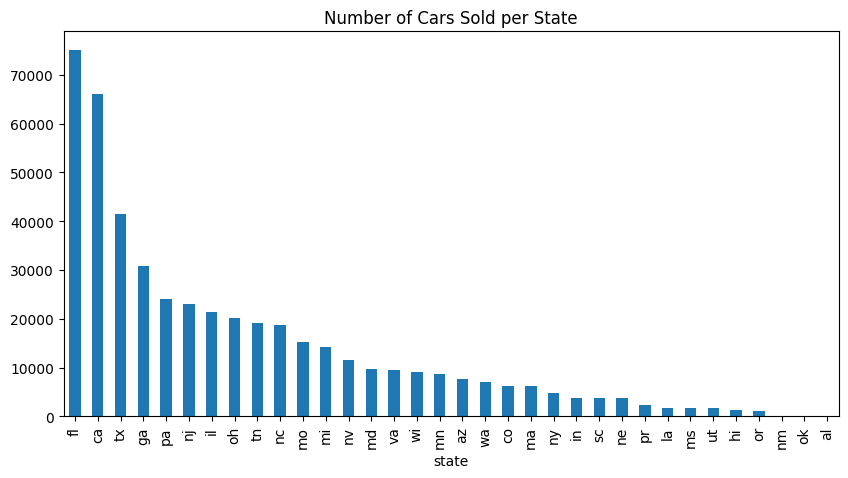

In [22]:
dfcarsperstate = df['state'].value_counts()
dfcarsperstate.plot.bar(title='Number of Cars Sold per State', figsize=(10,5))

In [23]:
len(df['state'].unique())

34

What sort of factors are most highly correlated with selling price?

Below I took a quick look at the numeric options we have available in this dataset to see what correlates the highest with selling price.

We can see that MMR is the most highly correlated, but that is simply because it is a market estimate of the selling price already. Other than that, the year of the model and the condition of the car are both somewhat corrlated to the selling price of the car.

In [24]:
df.corr(numeric_only=True)['sellingprice']

year             0.578178
condition        0.315467
odometer        -0.592268
mmr              0.984483
sellingprice     1.000000
annualmileage   -0.225718
Name: sellingprice, dtype: float64

As an excerise, what if we wanted to look at all the yellow Ferraris?

In [25]:
df.loc[(df['make'] == 'Ferrari') & (df['color'] == 'yellow')]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,annualmileage
529862,2004,Ferrari,360,Spider,Convertible,manual,zffyt53a840138209,pa,39.0,16309.0,yellow,black,teatero motor products,80000.0,81000.0,Thu Jun 11 2015 02:30:00 GMT-0700 (PDT),1359.083333
556120,2007,Ferrari,F430,Spider,convertible,automatic,zffew59a870152438,fl,29.0,39651.0,yellow,black,autoshow sales and service,96000.0,95500.0,Wed Jun 17 2015 04:55:00 GMT-0700 (PDT),4405.666667


Another exersize I think that would be fun to do is group the cars based on warranty status or not. Lets assume each car has a 3 year full coverage warranty, a 5 year powertrain warranty, and everything older than that does not have an active warranty anymore. We will not be taking account mileage into this calculation.

We can group the cars on those categories below. I am presuming the dataset was collected in 2016. So anything 2013 and newer will still have a full coverage warranty, and cars with the model year 2012 and 2011 will only have a powertrain warranty. 

In [26]:
df['warranty'] = pd.cut(x=df['year'], bins = [0, 2010, 2012, 2016], labels=['none','powertrain only','full coverage'])
df.sample(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,annualmileage,warranty
513465,2014,Ford,Escape,SE,suv,automatic,1fmcu0gx2eud41299,nj,4.0,5779.0,silver,black,ford motor credit company llc,18250.0,18100.0,Wed Jun 10 2015 02:00:00 GMT-0700 (PDT),2889.500000,full coverage
116105,2008,Saturn,VUE,XE,SUV,automatic,3gsdl43n68s594867,mo,43.0,91204.0,blue,gray,ford-lincoln dealer program,6050.0,9000.0,Wed Jan 14 2015 02:00:00 GMT-0800 (PST),11400.500000,none
30274,1992,Ford,Explorer,XLT,SUV,automatic,1fmdu34x1nua10739,fl,1.0,18069.0,gold,beige,coggin nissan at the avenues,375.0,500.0,Thu Feb 05 2015 04:45:00 GMT-0800 (PST),752.875000,none
334908,2005,Dodge,Durango,SLT,SUV,automatic,1d4hd48k65f577224,fl,19.0,131006.0,white,gray,southern auto finance co/safco/ft lauderdale,3550.0,3200.0,Fri Feb 20 2015 09:25:00 GMT-0800 (PST),11909.636364,none
272781,2013,Ford,Escape,SEL,SUV,automatic,1fmcu0hx3dud17137,tn,44.0,18265.0,—,black,ford motor credit company llc,19100.0,20100.0,Wed Feb 11 2015 02:00:00 GMT-0800 (PST),6088.333333,full coverage
399472,2013,Ram,1500,SLT,Crew Cab,automatic,1c6rr7lt0ds632784,mi,44.0,28680.0,white,gray,chrysler capital,26200.0,27400.0,Thu Mar 05 2015 01:30:00 GMT-0800 (PST),9560.000000,full coverage
65045,2012,Volkswagen,Passat,SE PZEV,Sedan,automatic,1vwbp7a35cc011145,ca,39.0,39824.0,white,beige,skyhigh remarketing inc,11850.0,12500.0,Wed Dec 31 2014 12:15:00 GMT-0800 (PST),9956.000000,powertrain only
250014,2012,Hyundai,Elantra,Limited,Sedan,automatic,kmhdh4ae4cu384014,ca,44.0,27628.0,silver,gray,hyundai motor finance,12750.0,13750.0,Tue Feb 10 2015 04:30:00 GMT-0800 (PST),6907.000000,powertrain only
330483,2014,Volkswagen,Jetta,SE PZEV,Sedan,automatic,3vwd17aj6em363323,nc,3.0,37168.0,black,black,enterprise vehicle exchange / tra / rental / t...,12350.0,11400.0,Tue Mar 03 2015 00:30:00 GMT-0800 (PST),18584.000000,full coverage
344170,2007,Chevrolet,Colorado,LS,Extended Cab,automatic,1gccs199778155848,in,19.0,301540.0,white,gray,ge fleet services for itself/servicer,1800.0,1400.0,Thu Feb 26 2015 02:00:00 GMT-0800 (PST),33504.444444,none


Now we can analyze cars based on warranty status with this new column in place.

In [27]:
df['warranty'].value_counts()

warranty
none               177471
full coverage      165101
powertrain only    128713
Name: count, dtype: int64

In [28]:
dfpricebywarranty = df.groupby('warranty', observed=False).sellingprice.agg(['mean','median','max'])
dfpricebywarranty

,mean,median,max
warranty,,,
none,7139.659601,5600.0,149800.0
powertrain only,16204.160186,14200.0,183000.0
full coverage,18842.466678,16300.0,173000.0


I really hope this was helpful and insightful to everyone! It was fun doing this analysis and I hope it was also fun to read through it as we explored the data together.